# Dataset Preparation

The dataset used in this project is available from https://www.kaggle.com/datasets/dansbecker/cityscapes-image-pairs

Let's take a look at what it contains.

### Dataset Exploration

In [1]:
%matplotlib inline

import os
import glob

import cv2
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np

In [2]:
TRAIN_PATH = '../data/train'
VAL_PATH = '../data/val'

In [3]:
train_files = glob.glob(f'{TRAIN_PATH}/*.jpg')

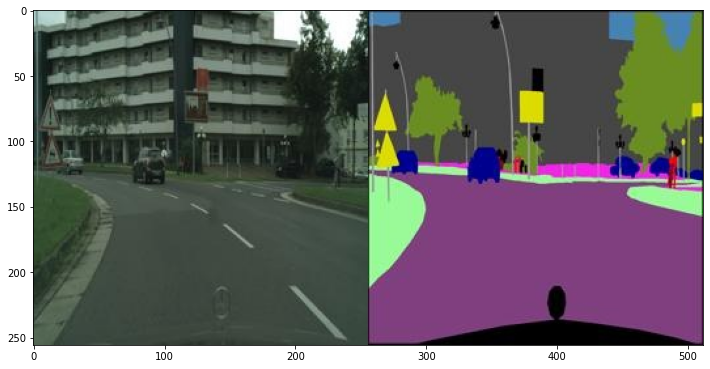

(256, 512, 3)


In [4]:
plt.figure(figsize=(12,8))

img = cv2.imread(train_files[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show();

print(img[:, :, :].shape)

We can see that the images should be split into 2 parts:
* Original Image
* Mask

In [5]:
def split_image(img):
    return img[:, :int(img.shape[1]/2), :], img[:, int(img.shape[1]/2):, :]

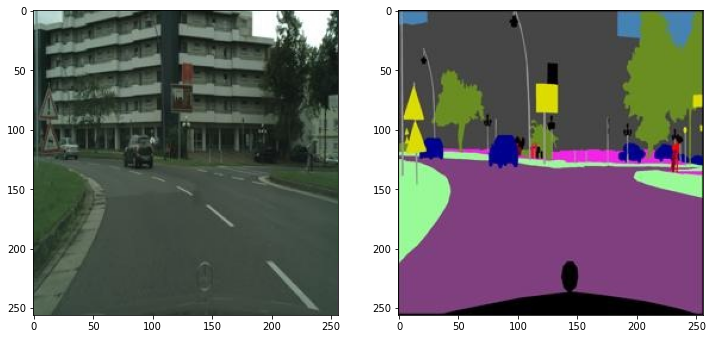

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))

img_original, img_mask = split_image(img)
ax[0].imshow(img_original)
ax[1].imshow(img_mask);

In [7]:
def create_missing_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def split_dataset(path):
    create_missing_dir(os.path.join(path, 'original'))
    create_missing_dir(os.path.join(path, 'mask'))
    for image_name in tqdm(glob.glob(f'{path}/*.jpg')):
        img = cv2.imread(image_name)
        img_original, img_mask = split_image(img)
        cv2.imwrite(os.path.join(path, 'original', os.path.basename(image_name)), img_original)
        cv2.imwrite(os.path.join(path, 'mask', os.path.basename(image_name)), img_mask)

In [8]:
split_dataset(TRAIN_PATH)
split_dataset(VAL_PATH)

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

## Mask handling

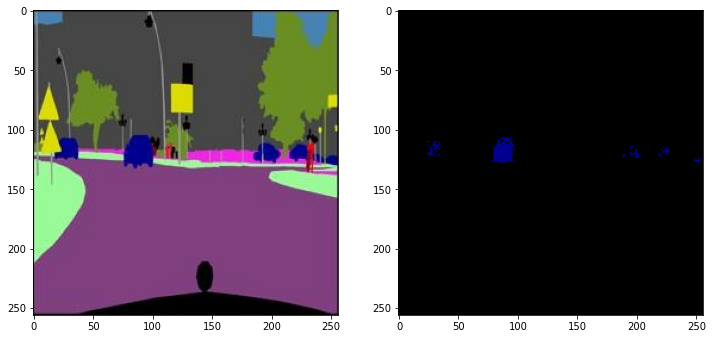

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))

lower_color_bounds = np.array([0, 0, 130])
upper_color_bounds = np.array([5, 5, 150])

mask = cv2.inRange(img_mask,lower_color_bounds,upper_color_bounds)
mask_rgb = cv2.cvtColor(mask,cv2.COLOR_GRAY2BGR)

ax[0].imshow(img_mask)
ax[1].imshow(img_mask & mask_rgb);